# The Demo of $S^2$Generator for Series-Symbol Data Generation

Time series data serves as the external manifestation of complex dynamical systems. This method aims to generate diverse complex systems represented by symbolic expressions $f(\cdot)$ — through unconstrained construction. It simultaneously generates excitation time series $X \in \mathbb{R} ^ {M \times L}$, which are then fed into the complex systems to produce their responses $Y=f(X) \in \mathbb{R} ^ {N \times L}$. Here, $M$, $N$ and $L$ denote the number of input channels, output channels, and series length, respectively.

In [1]:
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("..")) 
# Importing data generators, parameter controllers and visualization functions
from S2Generator import Generator, Params, plot_series, print_hello

print_hello()

Hello, S2Generator!
This is a Python package for generating time series data with symbolic representations.
For more information, please visit: https://github.com/wwhenxuan/S2Generator

   _____   ___     _____                                        _                  
  / ____| |__ \   / ____|                                      | |                 
 | (___      ) | | |  __    ___   _ __     ___   _ __    __ _  | |_    ___    _ __ 
  \___ \    / /  | | |_ |  / _ \ | '_ \   / _ \ | '__|  / _` | | __|  / _ \  | '__|
  ____) |  / /_  | |__| | |  __/ | | | | |  __/ | |    | (_| | | |_  | (_) | | |   
 |_____/  |____|  \_____|  \___| |_| |_|  \___| |_|     \__,_|  \__|  \___/  |_|                                   



(256, 1)
(73.5 add (cos((-7.57 add (3.89 mul x_0))) mul (((-0.092 mul exp((-63.4 add (-0.204 mul x_0)))) add (-6.12 mul log((-0.847 add (9.55 mul x_0))))) sub ((4.49 mul inv((-29.3 add (-86.2 mul x_0)))) add (-2.57 mul sqrt((51.3 add (-55.6 mul x_0))))))))


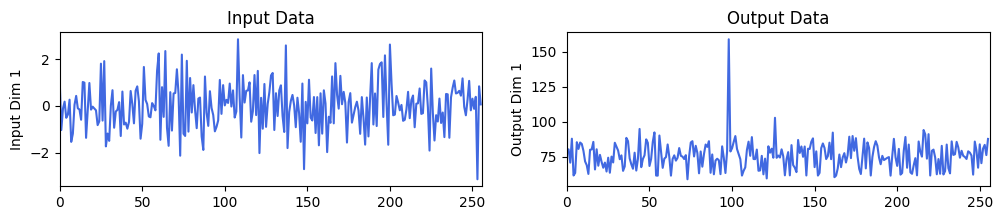

In [76]:
params = Params()  # Adjust the parameters here
generator = Generator(params)  # Create an instance

rng = np.random.RandomState(0)  # Creating a random number object
# Start generating symbolic expressions, sampling and generating series

trees, x, y = generator.run(rng, input_dimension=1, output_dimension=1, n_points=256)
# Print the expressions
print(trees)

# Visualize the time series
fig = plot_series(x, y)

(256, 1)
(73.5 add (cos((-7.57 add (3.89 mul x_0))) mul (((-0.092 mul exp((-63.4 add (-0.204 mul x_0)))) add (-6.12 mul log((-0.847 add (9.55 mul x_0))))) sub ((4.49 mul inv((-29.3 add (-86.2 mul x_0)))) add (-2.57 mul sqrt((51.3 add (-55.6 mul x_0))))))))


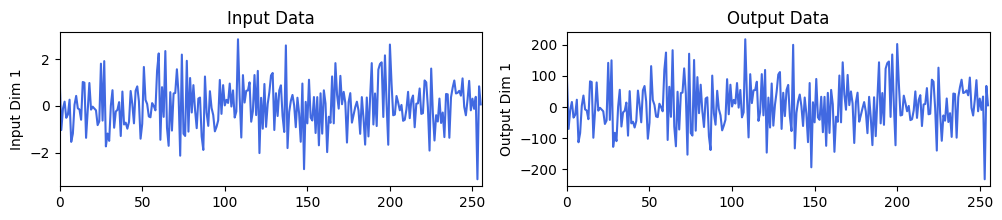

In [75]:
params = Params()  # Adjust the parameters here
generator = Generator(params)  # Create an instance

rng = np.random.RandomState(0)  # Creating a random number object
# Start generating symbolic expressions, sampling and generating series

trees, x, y = generator.run(rng, input_dimension=1, output_dimension=1, n_points=256, order=1)
# Print the expressions
print(trees)

# Visualize the time series
fig = plot_series(x, y)

(256, 1)
(73.5 add (cos((-7.57 add (3.89 mul x_0))) mul (((-0.092 mul exp((-63.4 add (-0.204 mul x_0)))) add (-6.12 mul log((-0.847 add (9.55 mul x_0))))) sub ((4.49 mul inv((-29.3 add (-86.2 mul x_0)))) add (-2.57 mul sqrt((51.3 add (-55.6 mul x_0))))))))


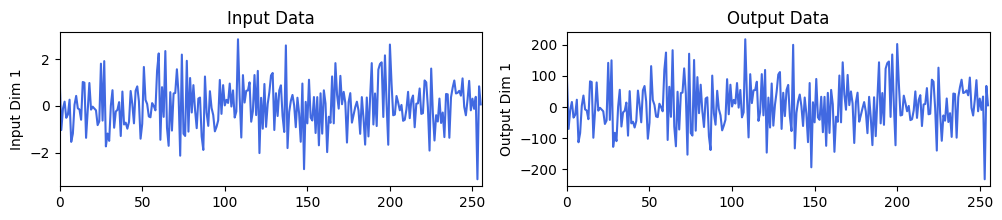

In [77]:
params = Params()  # Adjust the parameters here
generator = Generator(params)  # Create an instance

rng = np.random.RandomState(0)  # Creating a random number object
# Start generating symbolic expressions, sampling and generating series

trees, x, y = generator.run(rng, input_dimension=1, output_dimension=1, n_points=256, order=1)
# Print the expressions
print(trees)

# Visualize the time series
fig = plot_series(x, y)

(7.49 add ((((7.77 mul x_0) add (-89.8 mul sqrt((0.81 add (3.88 mul x_0))))) sub (0.14 mul x_1)) sub (-84.1 mul exp((9.58 add (-81.6 mul x_0)))))) | (-38.6 add ((87.1 mul sin((0.554 add (-57.5 mul x_1)))) sub ((-40.7 mul sin(((-0.86 mul exp((-6.46 add (3.31 mul x_0)))) add (5.57 mul x_0)))) sub (-65.5 mul log(((-0.318 mul x_1) add (-8.19 mul x_0)))))))


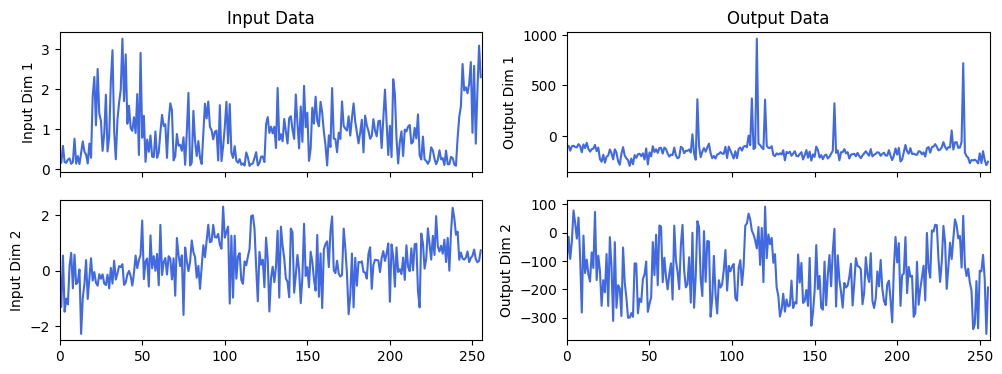

In [3]:
rng = np.random.RandomState(42)  # Change the random seed

# Try to generate the multi-channels time series
trees, x, y = generator.run(rng, input_dimension=2, output_dimension=2, n_points=256)
print(trees)
fig = plot_series(x, y)

In [6]:
fig.savefig("../images/ID2_OD2.jpg", dpi=300, bbox_inches="tight")

(9.0 add ((9.96 mul ((x_2 mul x_2) mul (exp(((2.31 mul x_1) add (-2.8 mul inv((-0.574 add (-6.84 mul x_1)))))) mul ((0.643 mul x_0) add (-21.8 mul x_0))))) add (-81.6 mul x_0))) | (-12.4 add ((-3.59 mul log(((-0.374 mul x_1) add ((-0.613 mul sqrt((-0.02 add (56.6 mul x_2)))) sub (8.1 mul inv((0.53 add (71.0 mul x_0)))))))) sub (0.411 mul inv((-0.294 add (6.1 mul x_1)))))) | (0.191 add ((4.22 mul inv((-0.099 add (-9.14 mul (((-0.996 mul x_0) sub (8.01 mul sin((46.0 add (-47.0 mul x_1))))) mul x_2))))) add (-1.12 mul sqrt(((82.9 mul x_0) sub (0.547 mul ((0.099 add (-0.28 mul x_0)))**2))))))


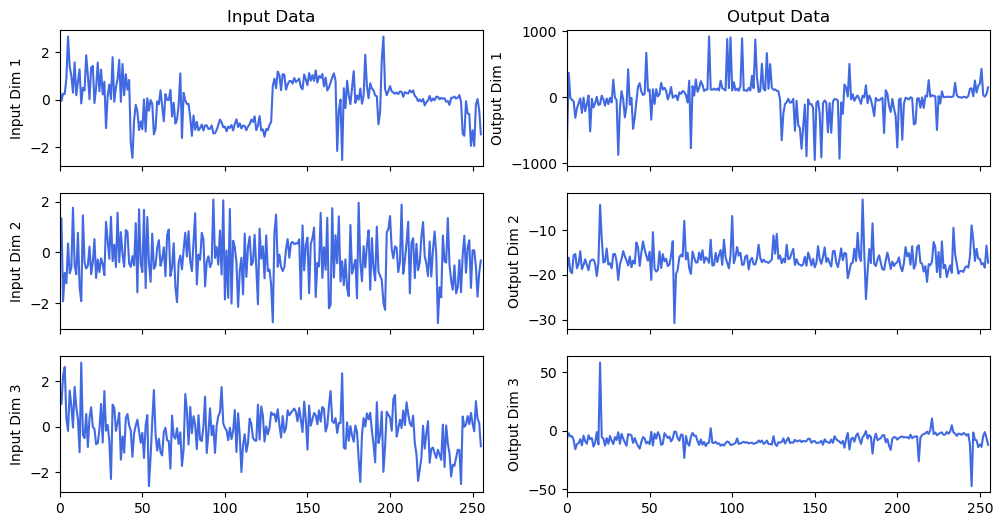

In [5]:
# Try to generate the 3-channels time series
trees, x, y = generator.run(rng, input_dimension=3, output_dimension=3, n_points=256)
print(trees)
fig = plot_series(x, y)

In [6]:
fig.savefig("../images/ID3_OD3.jpg", dpi=300, bbox_inches="tight")